Step 1: Importing Python libraries

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Step 2: Importing Customed Stock Dataset

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data As of 9.13.24/'
stocks = pd.read_csv(os.path.join(path, 'Stock Data/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns = 'Unnamed: 0', inplace = True)
stocks

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
0,2014-09-15,Amazon,79996340,16.1945,16.5455,16.5665,16.5665,NaN,NaN
1,2014-09-16,Amazon,65194220,16.3880,16.0535,16.4740,16.4740,NaN,NaN
2,2014-09-17,Amazon,82718520,16.2000,16.3880,16.4000,16.4000,NaN,NaN
3,2014-09-18,Amazon,51525880,16.2500,16.2720,16.3550,16.3550,NaN,NaN
4,2014-09-19,Amazon,137723240,16.5660,16.3800,16.6378,16.6378,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15097,2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,214.373616,141.061819
15098,2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,214.474932,141.172232
15099,2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,214.568767,141.284182
15100,2024-09-12,Tesla,72020040,229.8100,224.6600,231.4500,223.8300,214.663370,141.396991


In [ ]:
Step 3: Descriptive Stats

In [3]:
stocks.describe()

,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
count,1.510200e+04,15102.000000,15102.000000,15102.000000,15102.000000,12918.000000,4158.000000
mean,6.218104e+07,164.932340,164.891852,167.141696,163.301610,161.182704,163.691457
std,6.339542e+07,136.957821,136.961113,138.839367,134.855487,119.119027,86.323442
min,1.143952e+06,9.578000,9.488000,10.331300,9.403300,14.458877,59.077689
25%,1.848042e+07,52.198750,52.265000,52.835000,52.096250,59.350936,95.853917
50%,4.283434e+07,135.613350,135.785000,137.330000,135.345000,139.350874,132.538162
75%,8.626103e+07,227.865000,227.972475,232.342500,224.549950,234.425106,204.126277
max,9.140809e+08,701.350000,700.360000,711.330000,691.380000,542.559205,394.310159


In [4]:
stocks.groupby('Stock_Name').describe().transpose()

Stock_Name                   Amazon         Apple          Meta     Microsoft  \
Volume          count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   7.725108e+07  1.216528e+08  2.345579e+07  2.920282e+07   
                std    4.056725e+07  6.952824e+07  1.507759e+07  1.372597e+07   
                min    1.762674e+07  2.404834e+07  5.467488e+06  7.425603e+06   
                25%    5.179556e+07  7.452616e+07  1.479711e+07  2.093516e+07   
                50%    6.637534e+07  1.036255e+08  1.959942e+07  2.610348e+07   
                75%    9.059192e+07  1.483229e+08  2.713070e+07  3.345933e+07   
                max    4.769344e+08  6.475300e+08  2.323166e+08  2.025141e+08   
Close/Last in $ count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.563589e+01  9.016013e+01  2.071118e+02  1.763233e+02   
                std    5.301815e+01  6.159929e+01  1.064354e+02  1.177099e+02   
                min    1.434750e+01  2.258500e+01  7.263000e+01  4.029000e+01   
                25%    4.262650e+01  3.496000e+01  1.290700e+02  6.493000e+01   
                50%    9.220350e+01  5.599250e+01  1.793800e+02  1.381200e+02   
                75%    1.470300e+02  1.486000e+02  2.675700e+02  2.684000e+02   
                max    2.000000e+02  2.348200e+02  5.399100e+02  4.675600e+02   
Open in $       count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.566333e+01  9.009049e+01  2.069936e+02  1.762727e+02   
                std    5.305715e+01  6.155093e+01  1.064040e+02  1.176953e+02   
                min    1.422000e+01  2.250000e+01  7.079000e+01  4.034000e+01   
                25%    4.265250e+01  3.485250e+01  1.290100e+02  6.491000e+01   
                50%    9.213950e+01  5.619750e+01  1.791500e+02  1.386100e+02   
                75%    1.467485e+02  1.483100e+02  2.686400e+02  2.676400e+02   
                max    2.000900e+02  2.364800e+02  5.423500e+02  4.670000e+02   
High in $       count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.675724e+01  9.105898e+01  2.096682e+02  1.779696e+02   
                std    5.367723e+01  6.221170e+01  1.078155e+02  1.187585e+02   
                min    1.452100e+01  2.291750e+01  7.335000e+01  4.074000e+01   
                25%    4.277500e+01  3.518750e+01  1.301200e+02  6.522000e+01   
                50%    9.325000e+01  5.661000e+01  1.808000e+02  1.395400e+02   
                75%    1.486743e+02  1.498300e+02  2.716100e+02  2.716500e+02   
                max    2.012000e+02  2.372300e+02  5.442300e+02  4.683500e+02   
Low in $        count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03   
                mean   9.675724e+01  9.105898e+01  2.044307e+02  1.744992e+02   
                std    5.367723e+01  6.221170e+01  1.050319e+02  1.165329e+02   
                min    1.452100e+01  2.291750e+01  7.032000e+01  3.972000e+01   
                25%    4.277500e+01  3.518750e+01  1.278300e+02  6.448000e+01   
                50%    9.325000e+01  5.661000e+01  1.773600e+02  1.368850e+02   
                75%    1.486743e+02  1.498300e+02  2.647800e+02  2.650700e+02   
                max    2.012000e+02  2.372300e+02  5.285900e+02  4.644600e+02   
MA_365          count  2.153000e+03  2.153000e+03  2.153000e+03  2.153000e+03   
                mean   9.602441e+01  8.648604e+01  1.981872e+02  1.684642e+02   
                std    4.477492e+01  5.437815e+01  6.585946e+01  9.794966e+01   
                min    2.263769e+01  2.688352e+01  8.760832e+01  4.727863e+01   
                25%    5.177169e+01  3.759902e+01  1.562525e+02  7.457222e+01   
                50%    9.371187e+01  5.812051e+01  1.853601e+02  1.413175e+02   
                75%    1.341414e+02  1.482099e+02  2.440577e+02  2.744639e+02   
                max    1.650601e+02  1.880611e+02  3.820029e+02  3.741785e+02   
MA_1825         count  6.930000

Step 4: Prepping for Visualizations

In [5]:
# Grabbing today's date
max_date = max(stocks['Date'])
max_date

'2024-09-13'

In [6]:
# Filtering the dataset by using today's date
stocks_max_date = stocks[stocks['Date']==max_date]
stocks_max_date

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
2516,2024-09-13,Amazon,26495350,186.49,187.000,188.500,188.50,152.604329,120.403846
5033,2024-09-13,Apple,36766620,222.50,223.580,224.040,224.04,188.061068,113.335236
7550,2024-09-13,Meta,10321420,524.62,520.340,527.581,517.11,382.002863,245.446348
10067,2024-09-13,Microsoft,15874560,430.59,425.825,431.830,425.46,374.178534,223.099312
12584,2024-09-13,Netflix,2276482,697.06,680.010,699.640,680.00,509.065288,394.310159
15101,2024-09-13,Tesla,59515110,230.29,228.000,232.670,226.32,214.725918,141.509444


Text(0.5, 1.0, 'Shares Traded per Stock For Today')

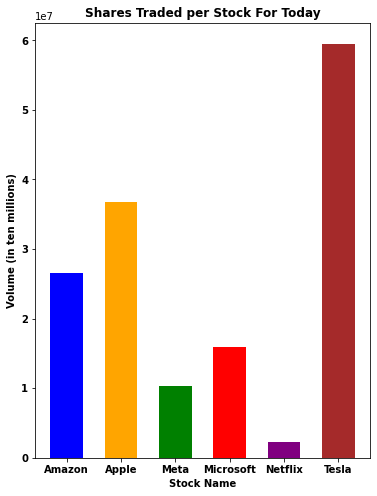

In [7]:
plt.figure(figsize=(6,8))
colors = ['blue','orange','green','red','purple','brown']
plt.bar(stocks_max_date['Stock_Name'], stocks_max_date['Volume'],
        color = colors, width = 0.6),
plt.xlabel('Stock Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('Volume (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Shares Traded per Stock For Today', fontsize = 12, fontweight = 'bold')

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.set_index('Date')
stocks

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2014-09-15,Amazon,79996340,16.1945,16.5455,16.5665,16.5665,NaN,NaN
2014-09-16,Amazon,65194220,16.3880,16.0535,16.4740,16.4740,NaN,NaN
2014-09-17,Amazon,82718520,16.2000,16.3880,16.4000,16.4000,NaN,NaN
2014-09-18,Amazon,51525880,16.2500,16.2720,16.3550,16.3550,NaN,NaN
2014-09-19,Amazon,137723240,16.5660,16.3800,16.6378,16.6378,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,214.373616,141.061819
2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,214.474932,141.172232
2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,214.568767,141.284182


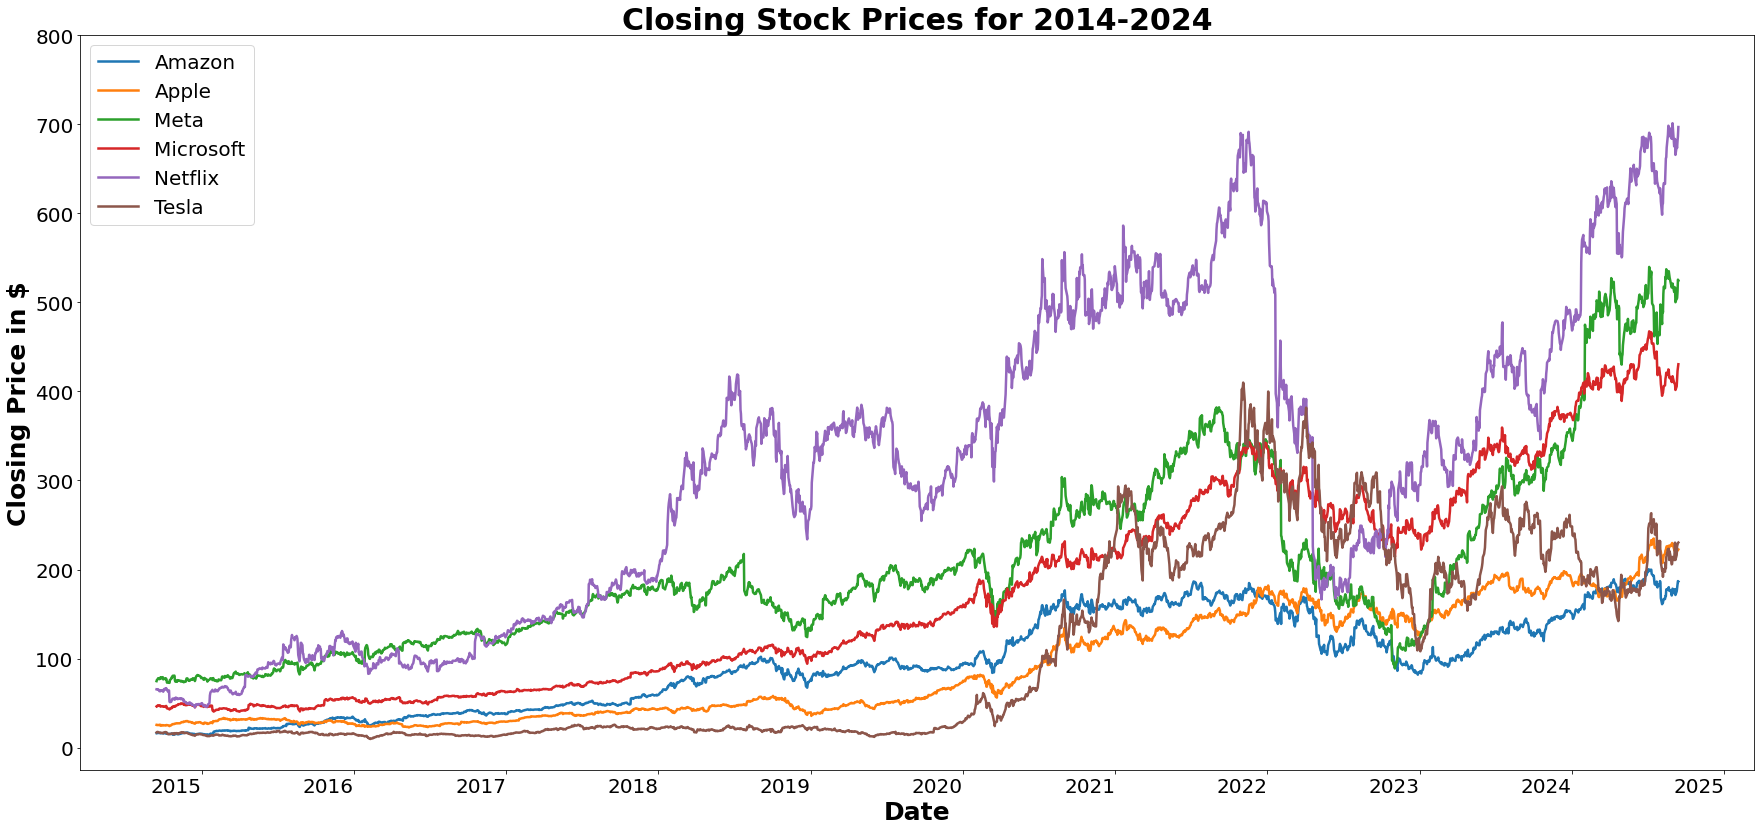

In [9]:
#Using a line chart to graph closing price of stocks within a 10 year frame
plt.figure(figsize=(30,15))
stocks.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5)
plt.title('Closing Stock Prices for 2014-2024', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 900, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [10]:
# Breaking dataset into multiple where each one is assigned to one specific stock, prepping for moving average analysis

In [11]:
moving_average = stocks[stocks['MA_1825'].notna()]
moving_average

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Amazon,60689760,172.2120,175.4170,175.927,175.9270,164.153882,79.451333
2021-12-13,Amazon,62169000,169.5675,172.0000,172.100,172.1000,164.222519,79.535373
2021-12-14,Amazon,55975280,169.0915,167.5500,169.499,169.4990,164.267011,79.619046
2021-12-15,Amazon,75794260,173.3150,168.5980,173.600,173.6000,164.330871,79.705137
2021-12-16,Amazon,60876840,168.8710,173.3686,174.166,174.1660,164.371462,79.788765
...,...,...,...,...,...,...,...,...
2024-09-09,Tesla,67443520,216.2700,216.2000,219.870,213.6700,214.373616,141.061819
2024-09-10,Tesla,78891140,226.1700,220.0700,226.400,218.6377,214.474932,141.172232
2024-09-11,Tesla,83548630,228.1300,224.5500,228.470,216.8003,214.568767,141.284182


In [12]:
moving_average_amazon_stock = moving_average[moving_average['Stock_Name']=='Amazon']
moving_average_amazon_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Amazon,60689760,172.2120,175.4170,175.927,175.927,164.153882,79.451333
2021-12-13,Amazon,62169000,169.5675,172.0000,172.100,172.100,164.222519,79.535373
2021-12-14,Amazon,55975280,169.0915,167.5500,169.499,169.499,164.267011,79.619046
2021-12-15,Amazon,75794260,173.3150,168.5980,173.600,173.600,164.330871,79.705137
2021-12-16,Amazon,60876840,168.8710,173.3686,174.166,174.166,164.371462,79.788765
...,...,...,...,...,...,...,...,...
2024-09-09,Amazon,29037360,175.4000,174.5300,175.850,175.850,151.687123,120.107492
2024-09-10,Amazon,36233800,179.5500,177.4900,180.500,180.500,151.912630,120.178197
2024-09-11,Amazon,42564700,184.5200,180.0950,184.990,184.990,152.143507,120.252501


In [13]:
moving_average_apple_stock = moving_average[moving_average['Stock_Name']=='Apple']
moving_average_apple_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Apple,115402700,179.45,175.205,179.63,179.63,130.568178,59.077689
2021-12-13,Apple,153237000,175.74,181.115,182.13,182.13,130.800267,59.160063
2021-12-14,Apple,139380400,174.33,175.250,177.74,177.74,131.021822,59.241770
2021-12-15,Apple,131063300,179.30,175.110,179.50,179.50,131.257788,59.326101
2021-12-16,Apple,150185800,172.26,179.280,181.14,181.14,131.468521,59.406547
...,...,...,...,...,...,...,...,...
2024-09-09,Apple,67179970,220.91,220.820,221.27,221.27,187.397068,112.930280
2024-09-10,Apple,51591030,220.11,218.920,221.48,221.48,187.568192,113.029657
2024-09-11,Apple,44587070,222.66,221.455,223.09,223.09,187.737753,113.131254


In [14]:
moving_average_meta_stock = moving_average[moving_average['Stock_Name']=='Meta']
moving_average_meta_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Meta,14527970,329.75,332.555,335.030,326.3700,301.441384,176.089553
2021-12-13,Meta,22948660,334.49,330.950,341.090,329.5900,301.718288,176.231970
2021-12-14,Meta,20461020,333.74,328.050,335.700,327.6500,301.974342,176.373153
2021-12-15,Meta,24681330,341.66,332.494,342.110,323.9800,302.250507,176.518485
2021-12-16,Meta,22635030,334.90,338.980,344.460,333.7400,302.500699,176.659800
...,...,...,...,...,...,...,...,...
2024-09-09,Meta,11047830,504.79,506.160,511.330,502.0800,378.602781,244.644479
2024-09-10,Meta,9899022,504.79,508.160,514.180,500.0278,379.435959,244.836304
2024-09-11,Meta,10782530,511.83,507.010,513.120,495.6000,380.275630,245.034786


In [15]:
moving_average_microsoft_stock = moving_average[moving_average['Stock_Name']=='Microsoft']
moving_average_microsoft_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Microsoft,38095690,342.54,334.980,343.0000,334.79,251.694808,120.136964
2021-12-13,Microsoft,28899430,339.40,340.680,343.7900,339.08,252.059575,120.297600
2021-12-14,Microsoft,44438700,328.34,333.220,334.6400,324.11,252.381877,120.451890
2021-12-15,Microsoft,35381120,334.65,328.610,335.1900,324.50,252.728178,120.609770
2021-12-16,Microsoft,35034830,324.90,335.710,336.7600,323.02,253.035219,120.762219
...,...,...,...,...,...,...,...,...
2024-09-09,Microsoft,15295130,405.72,407.240,408.6500,402.15,372.625822,222.325542
2024-09-10,Microsoft,19594290,414.20,408.200,416.3300,407.70,373.006562,222.513077
2024-09-11,Microsoft,19266920,423.04,415.500,423.9900,409.58,373.397055,222.706348


In [16]:
moving_average_netflix_stock = moving_average[moving_average['Stock_Name']=='Netflix']
moving_average_netflix_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Netflix,2748774,611.66,616.78,617.7400,605.880,537.049671,275.541088
2021-12-13,Netflix,2517915,604.56,612.00,612.6400,599.520,537.399452,275.836522
2021-12-14,Netflix,2984536,597.99,598.71,602.2900,588.130,537.684877,276.128422
2021-12-15,Netflix,2866196,605.04,598.18,605.6900,584.510,537.991397,276.424371
2021-12-16,Netflix,3143217,591.06,597.09,602.8308,588.000,538.233260,276.712309
...,...,...,...,...,...,...,...,...
2024-09-09,Netflix,2683111,675.42,674.00,683.5000,672.140,505.231068,393.153512
2024-09-10,Netflix,2079182,673.62,676.87,680.5899,665.805,506.190247,393.431726
2024-09-11,Netflix,2391924,681.47,677.46,682.9700,660.800,507.147616,393.718542


In [17]:
moving_average_tesla_stock = moving_average[moving_average['Stock_Name']=='Tesla']
moving_average_tesla_stock

,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $,MA_365,MA_1825
Date,,,,,,,,
2021-12-10,Tesla,59664366,339.0100,336.2500,340.3265,327.5100,217.076115,59.748730
2021-12-13,Tesla,78595508,322.1366,333.6966,335.0000,317.1400,217.737921,59.915970
2021-12-14,Tesla,70806277,319.5033,315.0000,322.1366,310.0000,218.362756,60.081515
2021-12-15,Tesla,75169238,325.3300,317.7366,326.2499,309.4167,219.000215,60.250230
2021-12-16,Tesla,82771448,308.9733,331.5000,331.6600,307.2833,219.597241,60.409893
...,...,...,...,...,...,...,...,...
2024-09-09,Tesla,67443520,216.2700,216.2000,219.8700,213.6700,214.373616,141.061819
2024-09-10,Tesla,78891140,226.1700,220.0700,226.4000,218.6377,214.474932,141.172232
2024-09-11,Tesla,83548630,228.1300,224.5500,228.4700,216.8003,214.568767,141.284182


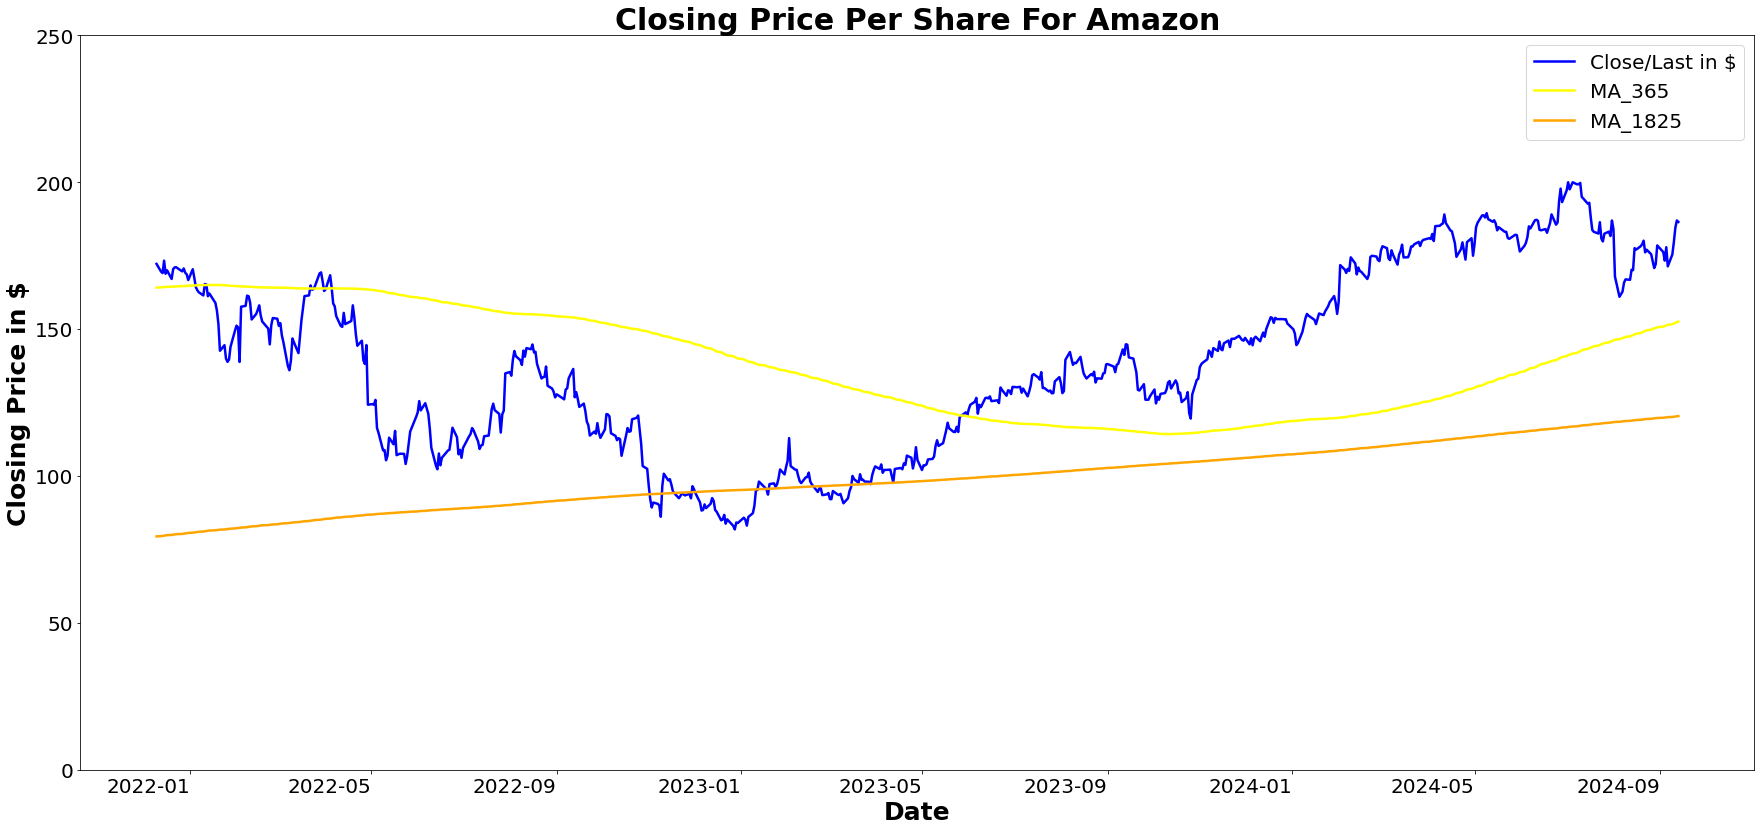

In [18]:
#Using a line chart to graph one year and five year moving averages for all stocks
plt.figure(figsize=(30,15))
moving_average_amazon_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_amazon_stock.groupby('Stock_Name')['MA_365'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'MA_365')
moving_average_amazon_stock.groupby('Stock_Name')['MA_1825'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'MA_1825')
plt.title('Closing Price Per Share For Amazon', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

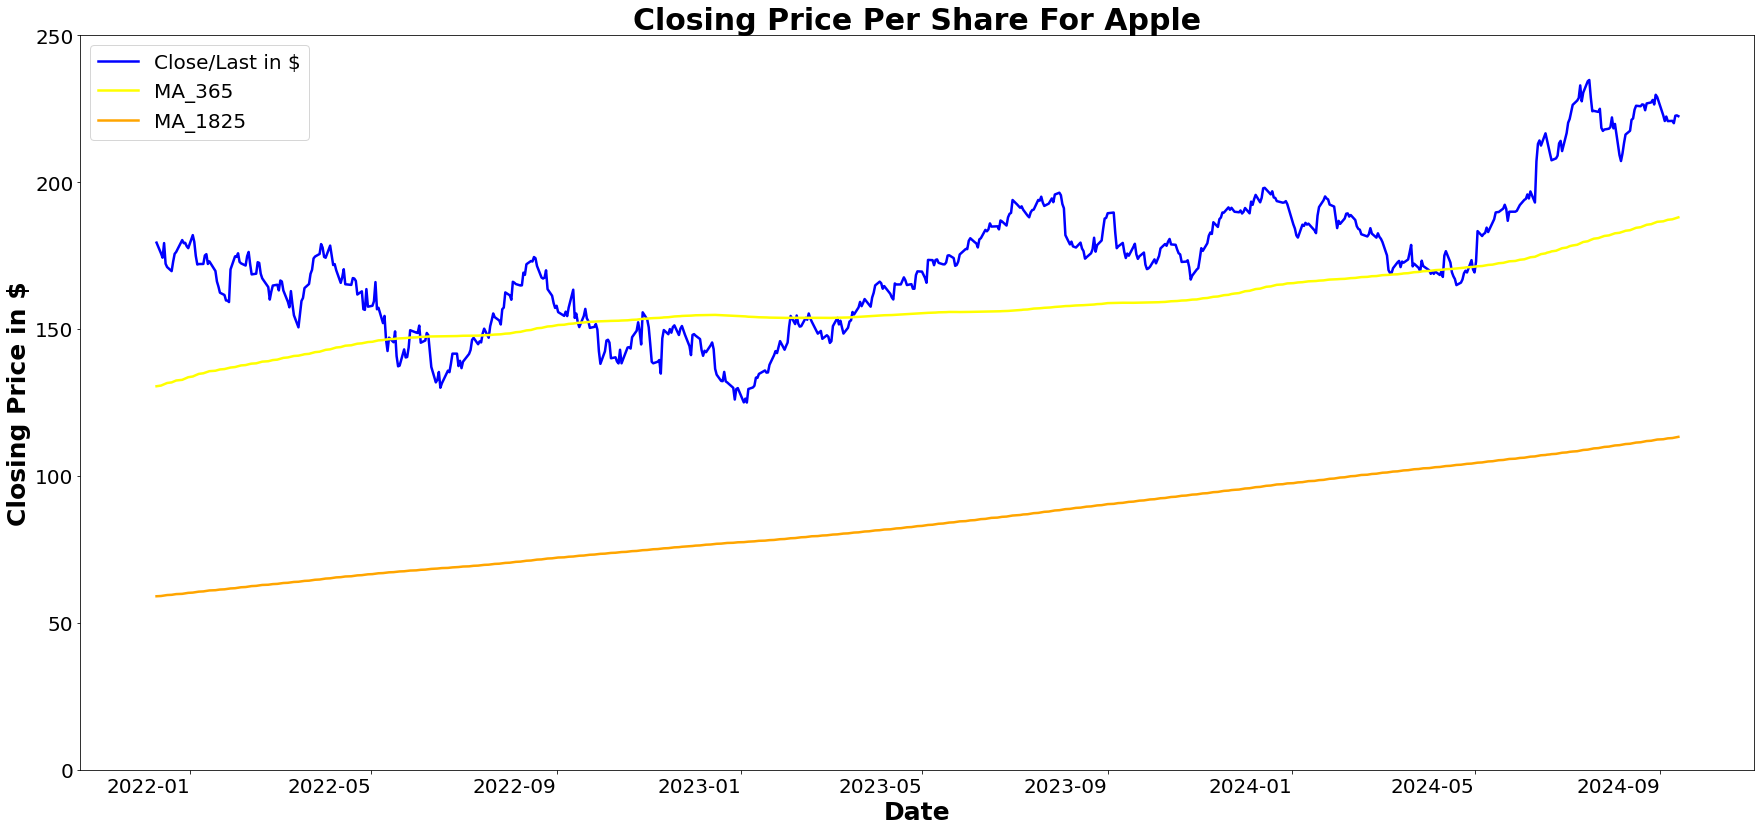

In [19]:
plt.figure(figsize=(30,15))
moving_average_apple_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_apple_stock.groupby('Stock_Name')['MA_365'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'MA_365')
moving_average_apple_stock.groupby('Stock_Name')['MA_1825'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'MA_1825')
plt.title('Closing Price Per Share For Apple', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

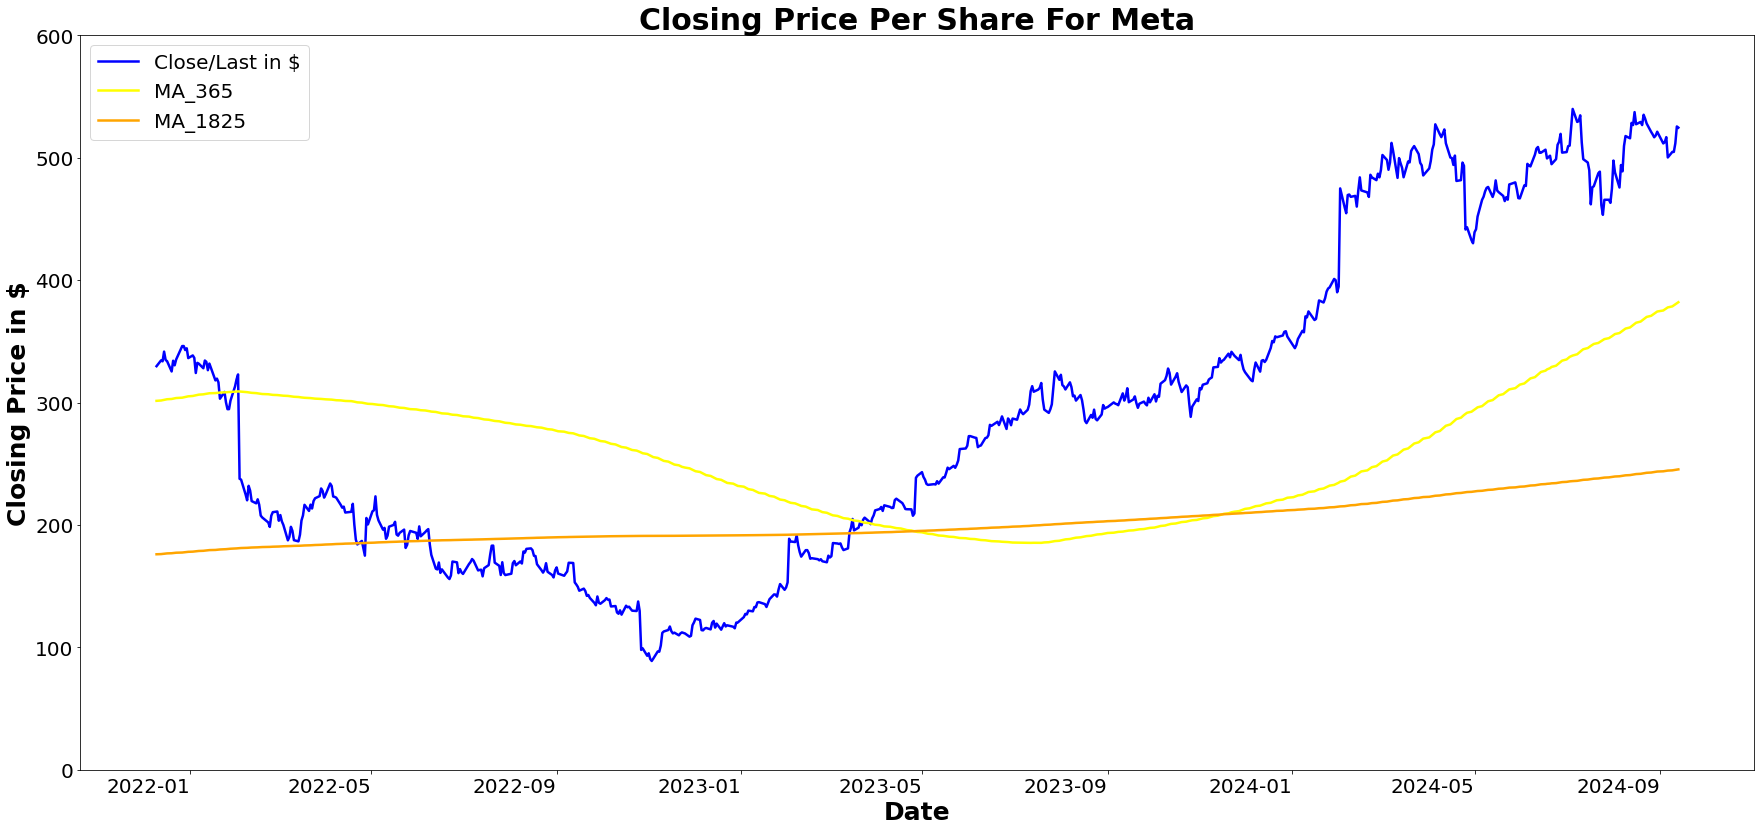

In [20]:
plt.figure(figsize=(30,15))
moving_average_meta_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_meta_stock.groupby('Stock_Name')['MA_365'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'MA_365')
moving_average_meta_stock.groupby('Stock_Name')['MA_1825'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'MA_1825')
plt.title('Closing Price Per Share For Meta', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 700, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

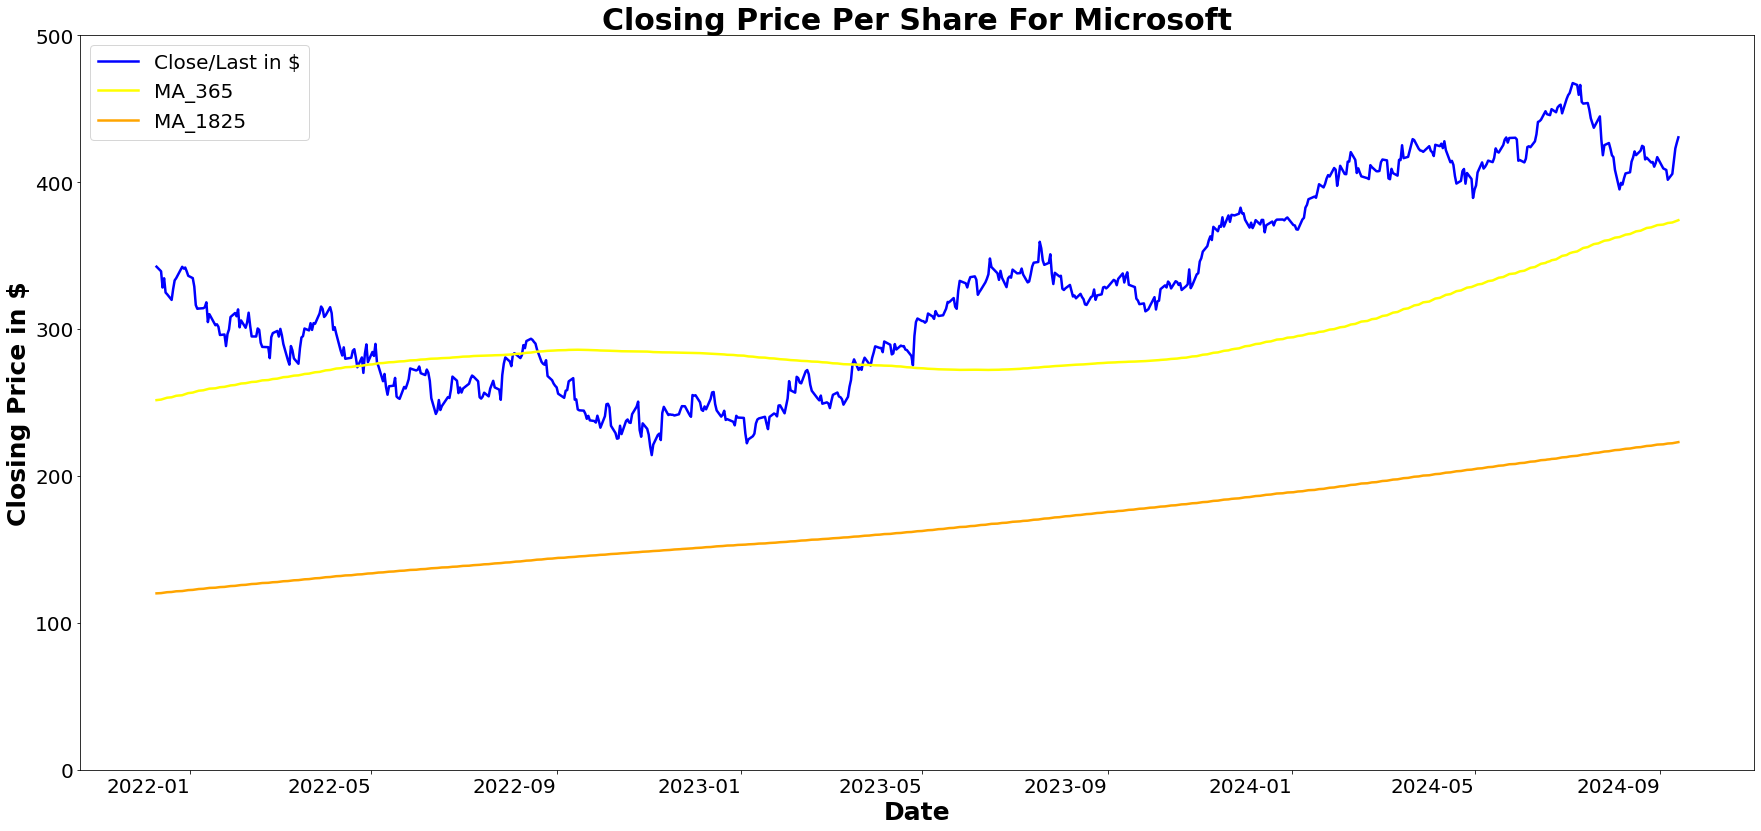

In [21]:
plt.figure(figsize=(30,15))
moving_average_microsoft_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_365'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'MA_365')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_1825'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'MA_1825')
plt.title('Closing Price Per Share For Microsoft', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

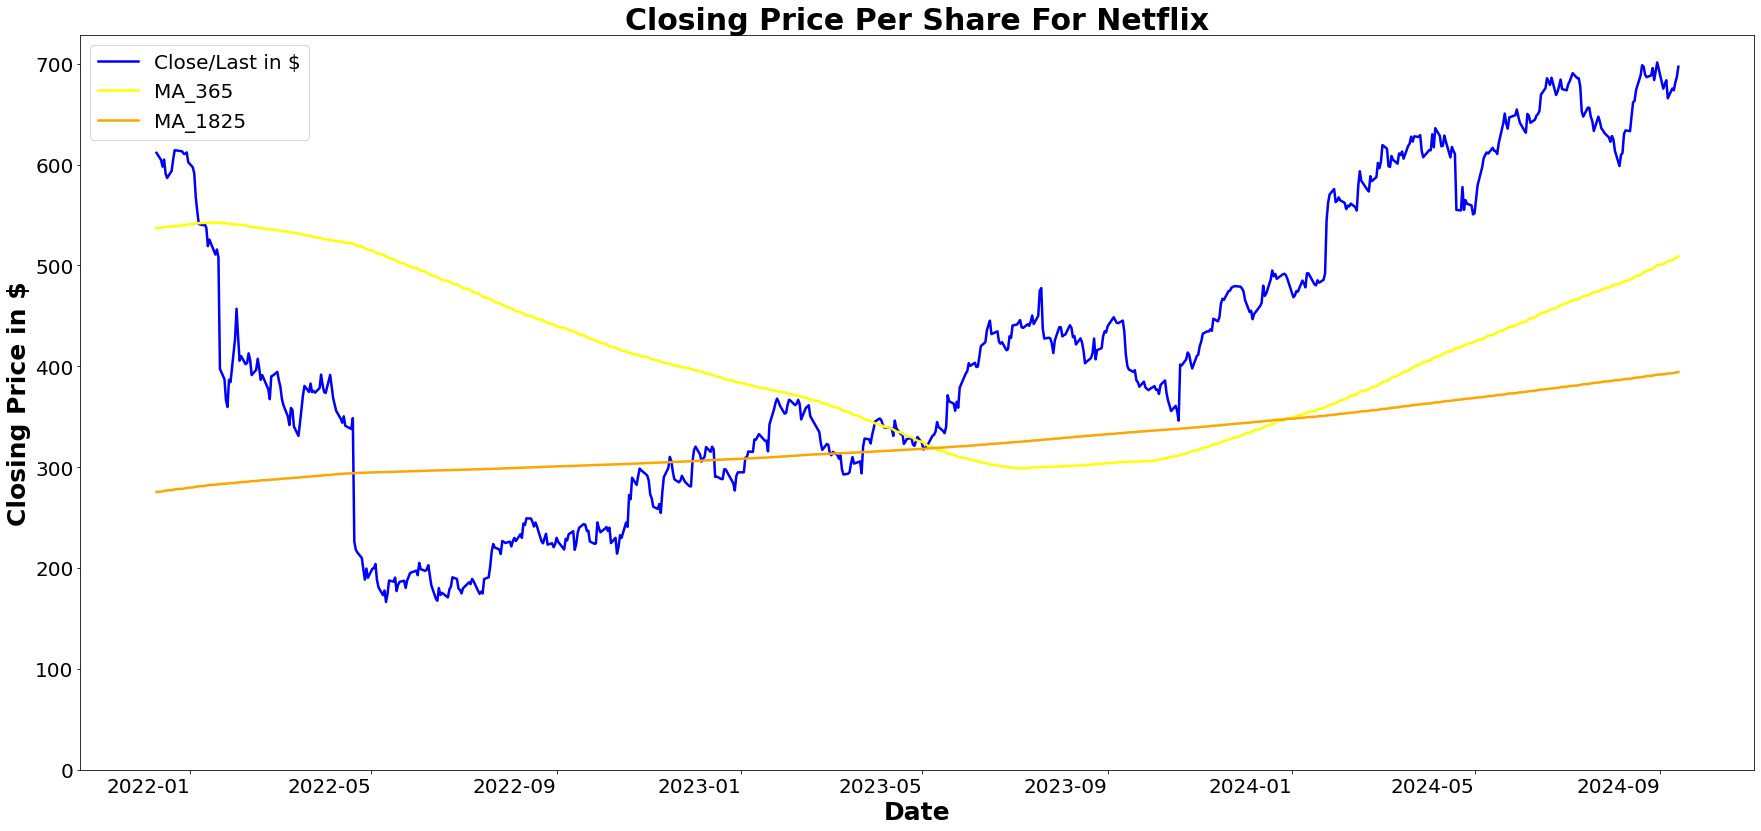

In [22]:
plt.figure(figsize=(30,15))
moving_average_netflix_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_netflix_stock.groupby('Stock_Name')['MA_365'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'MA_365')
moving_average_netflix_stock.groupby('Stock_Name')['MA_1825'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'MA_1825')
plt.title('Closing Price Per Share For Netflix', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 800, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

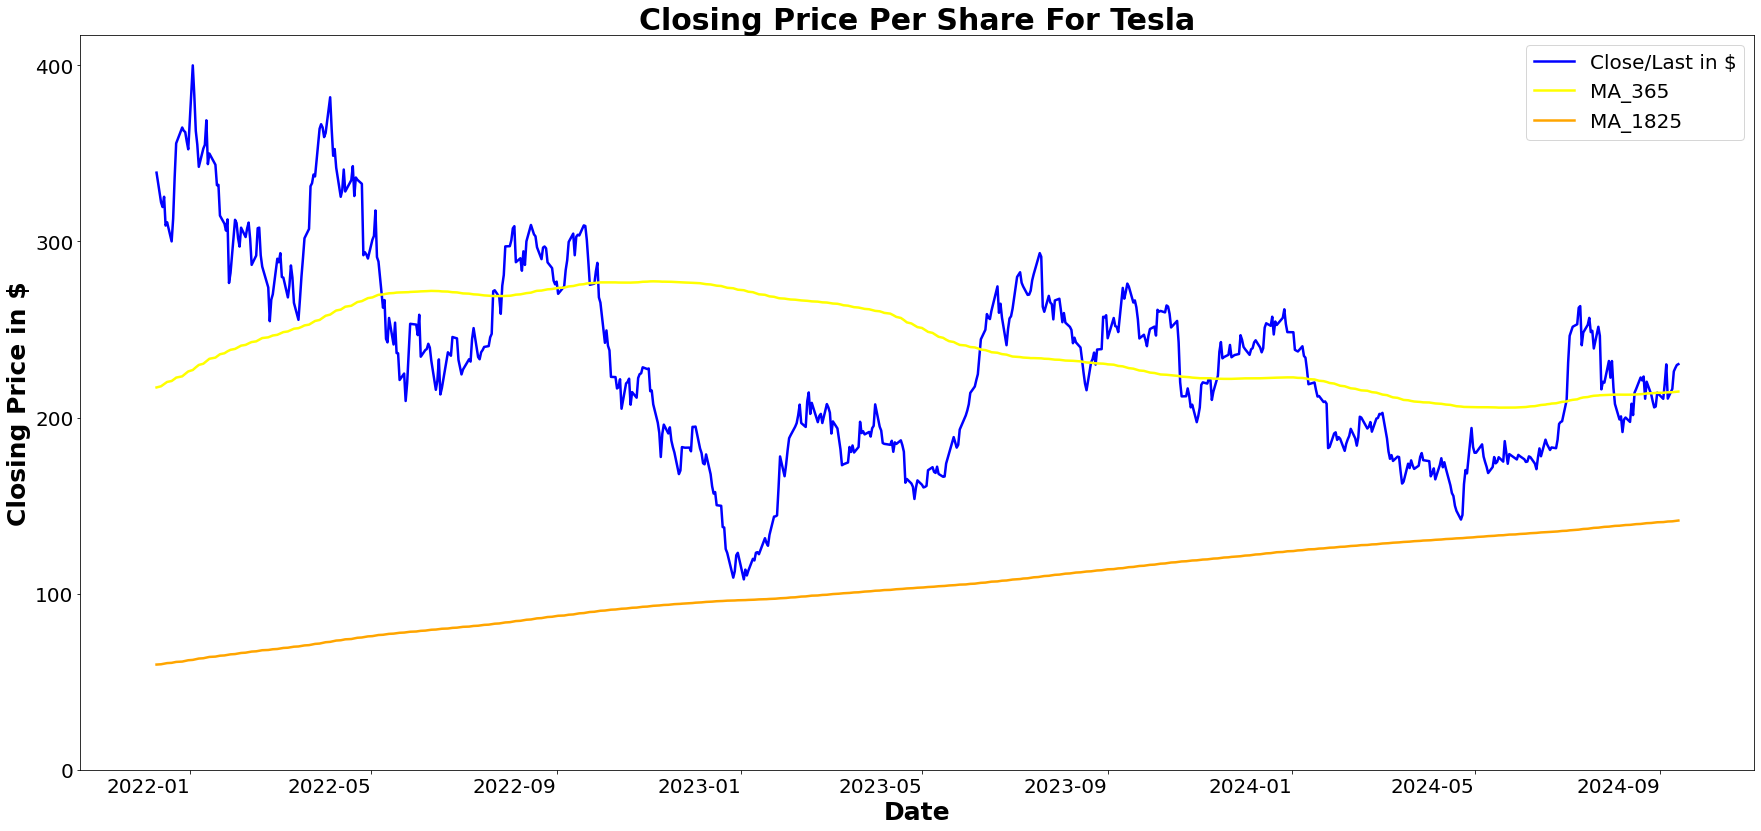

In [23]:
plt.figure(figsize=(30,15))
moving_average_tesla_stock.groupby('Stock_Name')['Close/Last in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_tesla_stock.groupby('Stock_Name')['MA_365'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'MA_365')
moving_average_tesla_stock.groupby('Stock_Name')['MA_1825'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'MA_1825')
plt.title('Closing Price Per Share For Tesla', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 500, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)